In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [46]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice_data = pd.read_sql_query('select * from houseprices', con= engine)
engine.dispose()

houseprice_data.info()
houseprice_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [0]:
numerical = []
non_numerical = []
for col in houseprice_data:
  if houseprice_data[col].dtypes == 'object':
    non_numerical.append(col)
  else:
    numerical.append(col)



In [0]:
houseprice_data[numerical].corr()['saleprice'].sort_values(ascending = False)
numerical_features = ['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']

43


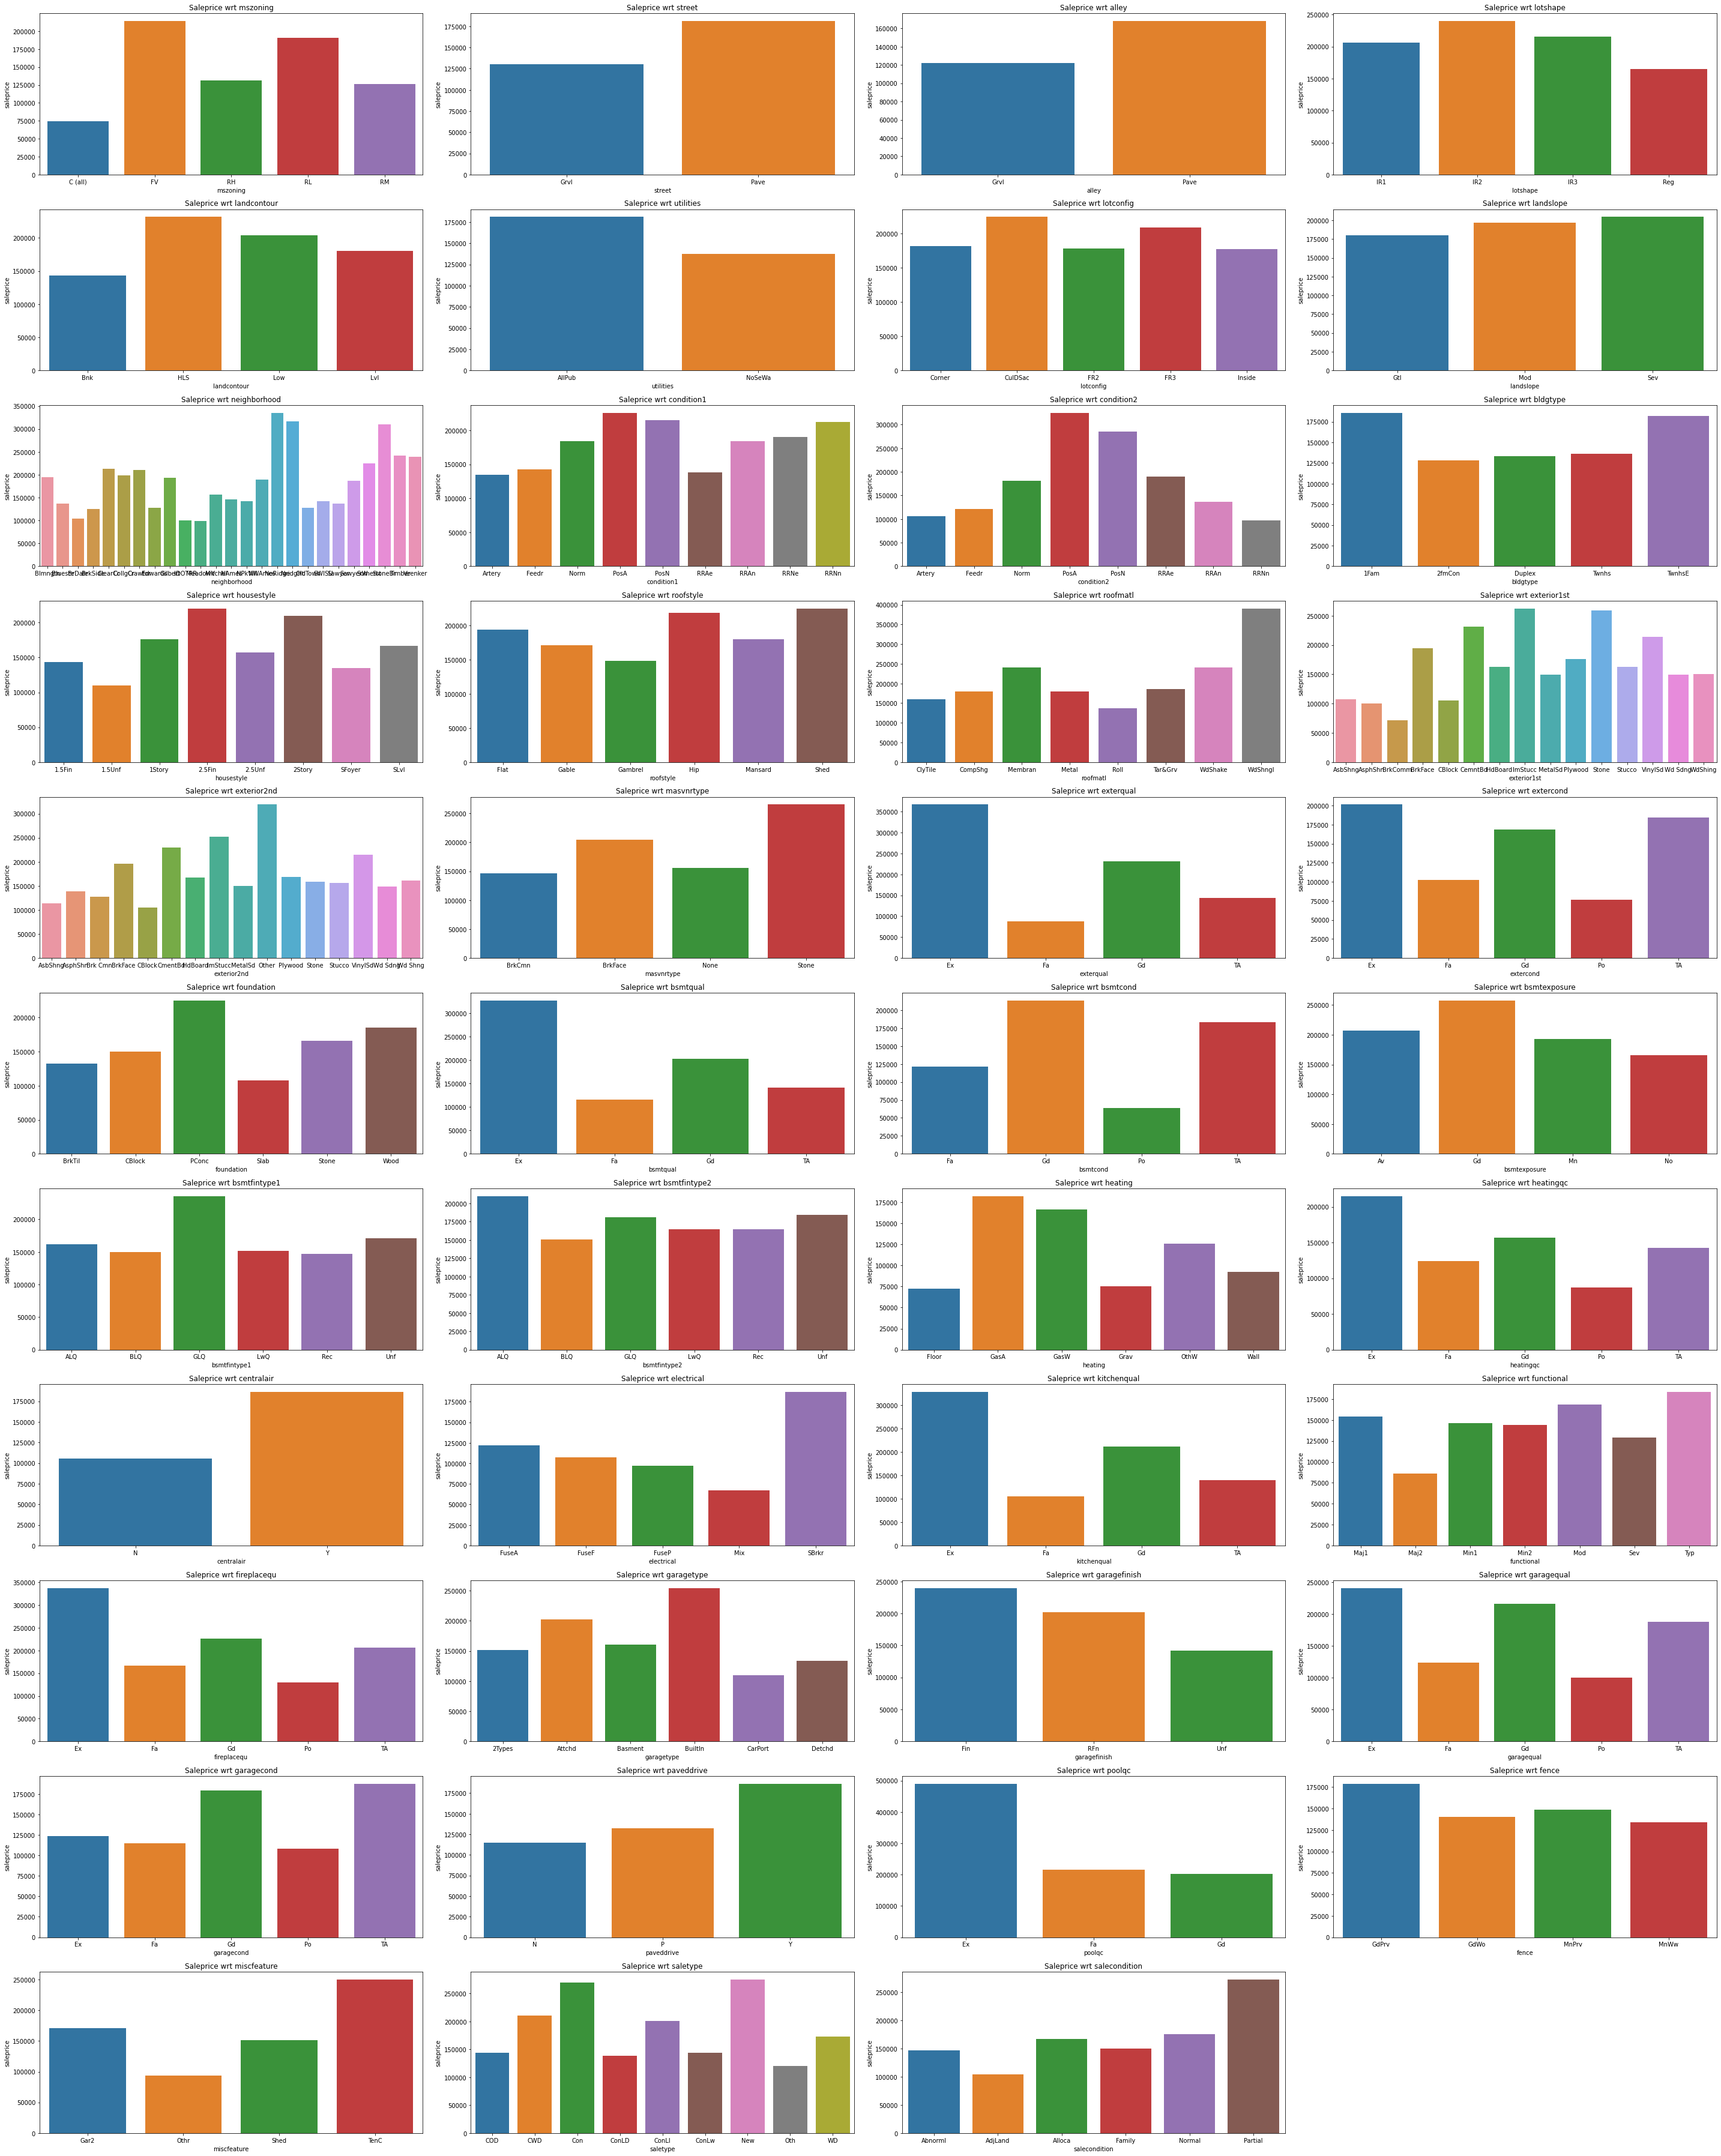

In [41]:
print(len(non_numerical))
plt.figure(figsize=(40,50))
for index, col in enumerate(non_numerical):
  plt.subplot(11,4,index +1)
  sns.barplot(houseprice_data.groupby(col)['saleprice'].mean().index, houseprice_data.groupby(col)['saleprice'].mean())
  plt.xlabel(col)
  plt.ylabel('saleprice')
  plt.title('Saleprice wrt {}'.format(col))

plt.tight_layout()
plt.show()

non_numerical_features = ['mszoning', 'street', 'neighborhood']


In [0]:
non_numerical_features
ms_zoning_dummies = pd.get_dummies(houseprice_data.mszoning, drop_first= True)
street_dummies = pd.get_dummies(houseprice_data.street, drop_first=True)
neighborhood_dummies = pd.get_dummies(houseprice_data.neighborhood, drop_first=True)
houseprice_data = pd.concat([ms_zoning_dummies, street_dummies, houseprice_data], axis=1)

In [77]:
X = houseprice_data[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearbuilt']]
Y = houseprice_data.saleprice
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     689.0
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:15:23   Log-Likelihood:                -13120.
No. Observations:                1095   AIC:                         2.625e+04
Df Residuals:                    1089   BIC:                         2.628e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.295e+05      1e+05     -6.275      

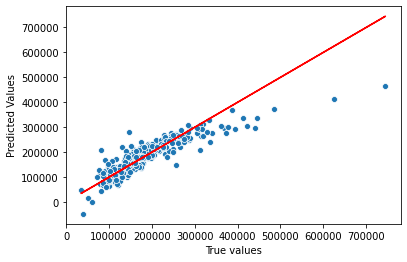

Mean absolute error of the prediction is: 24480.58867779213
Mean squared error of the prediction is: 1387215535.022604
Root mean squared error of the prediction is: 37245.342460804466
Mean absolute percentage error of the prediction is: 15.10749590825052


In [78]:
x_test = sm.add_constant(x_test)
predictions = results.predict(x_test)

sns.scatterplot(y_test, predictions)
plt.plot(y_test, y_test,color = 'red')
plt.xlabel('True values')
plt.ylabel('Predicted Values')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, predictions)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, predictions)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - predictions) / y_test)) * 100))
